In [1]:
from functools import partial

import tensorflow as tf
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('dataset/data.csv')

In [37]:
df.head()

,filename,lt_condyle,lt_subcondyle,lt_angle,lt_body,lt_parasymphysis,rt_condyle,rt_subcondyle,rt_angle,rt_body,rt_parasymphysis,symphysis,dentoalveolar,alveolar_process
0,OPG Film Set 2/0_fx alveolar process and fx ri...,0,0,0,0,0,1,0,0,0,0,0,0,1
1,OPG Film Set 1/case1.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0
2,OPG Film Set 1/case17.jpg,0,0,0,0,1,0,0,1,0,0,0,0,0


In [3]:
y_cols = [c for c in df.columns if c != 'filename']

In [38]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, rotation_range=10)

In [39]:
gen = partial(
    img_gen.flow_from_dataframe, 
    df, 
    directory='./dataset/', 
    y_col=y_cols, 
    class_mode='raw',
    batch_size=1)

In [40]:
dataset = tf.data.Dataset.from_generator(
    gen,
    output_types=(tf.float32, tf.float32))
dataset = dataset.shuffle(3)

Found 3 validated image filenames.
tf.Tensor([[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]], shape=(1, 13), dtype=float32)


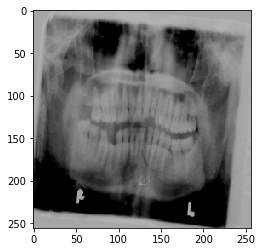

In [56]:
image, label = next(iter(dataset))
plt.imshow(image.numpy()[0])
print(label)

tf.Tensor([[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 13), dtype=float32)
